In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import glob
import math
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
#import mglearn
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
#from mglearn.plot_helpers import cm2, cm3, discrete_scatter
from sklearn.tree._tree import TREE_LEAF
from IPython.display import display, Image
from sklearn.externals.six import StringIO  
#import pydotplus
from sklearn.tree import _tree
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit,learning_curve
import matplotlib.patches as mpatches
import time
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
import statsmodels.formula.api as sm
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics


C:\Users\harki\AppData\Roaming\Python\Python36\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [2]:
df= pd.read_csv('energydata_complete_new.csv')

In [3]:
df['Appliances_log']=np.where(df['Appliances'] <=60, 0,1) 

In [4]:
cols=[ 'lights','RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',  'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint']
X=df[cols]
target='Appliances_log'
y= df[target]

In [5]:
X=X.values
y=y.values

In [7]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=5)

In [8]:
X_test

array([[-0.47907978,  0.97932482, -0.79401942, ...,  0.39175283,
        -1.29983786,  0.12857022],
       [-0.47907978, -0.09040497,  0.20464994, ..., -0.42418787,
        -1.55419543, -0.90054502],
       [-0.47907978, -0.96997919, -1.20443149, ..., -0.69616811,
         1.97854861, -1.23828555],
       ...,
       [-0.47907978, -1.8428519 , -0.27872427, ...,  0.05177754,
         0.14152171, -1.50847797],
       [ 0.78103476, -0.30904199, -1.21963194, ..., -1.24012858,
         0.31109342, -1.9574742 ],
       [-0.47907978,  0.3527329 , -1.75164758, ..., -0.15220764,
        -2.96729304,  0.22393225]])

In [90]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [25]:
def graph_roc_curve_t_multiple(r_svc_fpr, r_svc_tpr,Knn_fpr, Knn_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
#     plt.plot(l_svc_fpr, l_svc_tpr, label='Linear Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, 
#                                                                                                       linear_pred_test)))
    plt.plot(r_svc_fpr, r_svc_tpr, label='RBF Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, 
                                                                                                      RBF_pred_test)))
#     plt.plot(p_svc_fpr, p_svc_tpr, label='Poly Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, 
#                                                                                                      Poly_pred_test)))
#     plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, 
#                                                                                                 Decision_Tree_pred_test)))
#     plt.plot(XGboost_tree_fpr, XGboost_tree_tpr, label='XGboost Decision Tree Classifier Score: {:.4f}'.format(
#          roc_auc_score(y_test,XGboost_Decision_Tree_pred_test)))
    plt.plot(Knn_fpr, Knn_tpr, label='KNN Classifier Score: {:.4f}'.format(
         roc_auc_score(y_test,Knn_pred_test)))
#     plt.plot(NN_fpr, NN_tpr, label='Neural Network Classifier Score: {:.4f}'.format(
#          roc_auc_score(y_test,NN_pred_test)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
            )
    plt.legend()

In [54]:
def plot_learning_curve(estimator, title, X_train, y_train, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    print('Cross Validation Score :',test_scores_mean)
    print('Training Score :',train_scores_mean)

# KNN Classifier

In [85]:
# KNN Classifier
knears_params = {"n_neighbors": list(range(2,6,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params).fit(X_train, y_train)

# KNears best estimator
knears_neighbors = grid_knears.best_estimator_
print('Best parameters of KNN classifiers are:',knears_neighbors)

C:\Users\harki\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters of KNN classifiers are: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')


In [86]:
# Confusion Matrix for Decision Tree 
Knn_pred = knears_neighbors.predict(X_test)


In [87]:
print('Confusion matrix:')
print('KNN Classifier Accuracy on test set:', round(accuracy_score(y_test,Knn_pred) * 100, 2).astype(str) + '%')
print(confusion_matrix(y_test,Knn_pred))
print(classification_report(y_test,Knn_pred))

Confusion matrix:
KNN Classifier Accuracy on test set: 88.06%
[[2902  294]
 [ 413 2312]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3196
           1       0.89      0.85      0.87      2725

   micro avg       0.88      0.88      0.88      5921
   macro avg       0.88      0.88      0.88      5921
weighted avg       0.88      0.88      0.88      5921



In [88]:
print('KNN Classifier Accuracy on test set:', round(accuracy_score(y_test,Knn_pred) * 100, 2).astype(str) + '%')

KNN Classifier Accuracy on test set: 88.06%


<module 'matplotlib.pyplot' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

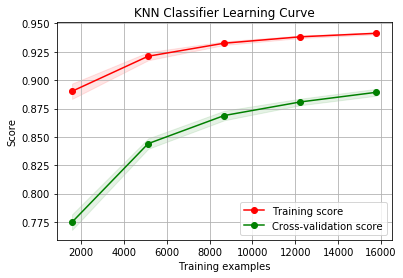

In [91]:
title = 'KNN Classifier Learning Curve'
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = knears_neighbors
plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv, n_jobs=4)

In [126]:
 from sklearn.model_selection import cross_validate


In [127]:
trainerr = []
crosserr = []
traintim = []
crosstim = []
Ks = []
for K in range(1,31):
    knnmodel = KNeighborsClassifier(n_neighbors = K, leaf_size = 1, weights = 'uniform',algorithm='auto', metric = 'manhattan')
    scores = cross_validate(knnmodel, X_train, y_train, scoring="accuracy",cv=5,
                            return_estimator = True, return_train_score = True, n_jobs = 3)
    trainerr.append(1-np.mean(scores['train_score']))
    crosserr.append(1-np.mean(scores['test_score']))
    traintim.append(np.mean(scores['fit_time']))
    crosstim.append(np.mean(scores['score_time']))
    Ks.append(K)

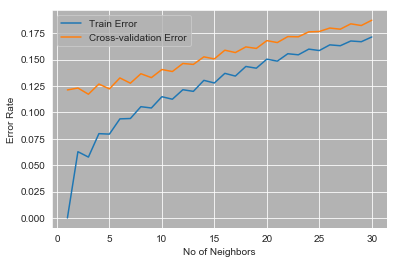

In [128]:
sns.set_style("darkgrid", {"axes.facecolor": ".7"})
plt.plot(Ks, trainerr)
plt.plot(Ks, crosserr)
plt.xlabel('No of Neighbors')
plt.ylabel('Error Rate')
plt.legend(['Train Error','Cross-validation Error'])

# ANN

In [9]:
dense_layers = [1,2,3]
layer_sizes = {1:[32,16,8],2:[64,32,16]}

In [10]:
# Defining model for Neural Networks
for dense_layers in dense_layers:
    for layer_size in layer_sizes:
        model = Sequential()
        
        #Input Layer
        model.add(Dense(name= 'Input_layer',units=X_train.shape[1],input_shape=(X_train.shape[1],),activation = "relu"))
        
        #Dense Layers
        model.add(Dense(name= 'Dense_layer-1',units = layer_sizes[layer_size][0], activation="sigmoid"))
        for l in range(dense_layers-1):
            model.add(Dense(name= 'Dense_layer-{}'.format(l+2),units = layer_sizes[layer_size][l+1], activation="sigmoid"))
            
        #Output Layer
        model.add(Dense(name= 'Output_layer',units = 2, activation="sigmoid"))
        
        Name = 'Energy Train - Dense{}--nodes--dense{}'.format(dense_layers,layer_sizes[layer_size],int(time.time()))
        tensorboard = TensorBoard(log_dir = 'logs\{}'.format(Name))
        
        model.compile(loss= 'sparse_categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
        model.fit(X_train,y_train,batch_size=128,epochs=30,validation_split = 0.3,callbacks=[tensorboard])

Train on 9669 samples, validate on 4145 samples
Epoch 1/30
9669/9669 [==============================] - 1s 136us/sample - loss: 0.6647 - accuracy: 0.6040 - val_loss: 0.6198 - val_accuracy: 0.6753
Epoch 2/30
9669/9669 [==============================] - 0s 25us/sample - loss: 0.5881 - accuracy: 0.7010 - val_loss: 0.5513 - val_accuracy: 0.7329
Epoch 3/30
9669/9669 [==============================] - 0s 24us/sample - loss: 0.5418 - accuracy: 0.7327 - val_loss: 0.5168 - val_accuracy: 0.7517
Epoch 4/30
9669/9669 [==============================] - 0s 30us/sample - loss: 0.5188 - accuracy: 0.7465 - val_loss: 0.4986 - val_accuracy: 0.7739
Epoch 5/30
9669/9669 [==============================] - 0s 30us/sample - loss: 0.5048 - accuracy: 0.7555 - val_loss: 0.4885 - val_accuracy: 0.7752
Epoch 6/30
9669/9669 [==============================] - 0s 31us/sample - loss: 0.4955 - accuracy: 0.7641 - val_loss: 0.4815 - val_accuracy: 0.7814
Epoch 7/30
9669/9669 [==============================] - 0s 27us/sampl

KeyboardInterrupt: 

In [77]:
print('Neural Networks Accuracy on test set:', round(model.evaluate(X_test, y_test, 
                                                                        batch_size=128)[1] * 100, 2).astype(str) + '%')

5921/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Neural Networks Accuracy on test set: 80.83%


In [76]:
print('Neural Networks Accuracy on training set:', round(model.evaluate(X_train, y_train)[1] * 100, 2).astype(str) + '%')

13814/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Neural Networks Accuracy on test set: 83.01%


In [61]:
# NN_pred_test = model.predict_classes(X_test)
# # Confusion Matrix for Decision Tree 
# NN_pred_test = model.predict_classes(X_test,batch_size=200, verbose=0)
# NN_cm_test = confusion_matrix(y_test,NN_pred_test)
# NN_Conf_matrix_test = pd.DataFrame(NN_cm_test,index = ['Predicted Fraud','Predicted No Fraud'],\
#                              columns = ['Actual Fraud','Actual No Fraud'])
# NN_Conf_matrix_test

In [79]:
dense_layers = [1,2,3]
layer_sizes = {1:[32,16,8],2:[64,32,16]}
# Defining model for Neural Networks
for dense_layers in dense_layers:
    for layer_size in layer_sizes:
        model = Sequential()
        
        #Input Layer
        model.add(Dense(name= 'Input_layer',units=X_train.shape[1],input_shape=(X_train.shape[1],),activation = "relu"))
        
        #Dense Layers
        model.add(Dense(name= 'Dense_layer-1',units = layer_sizes[layer_size][0], activation="relu"))
        for l in range(dense_layers-1):
            model.add(Dense(name= 'Dense_layer-{}'.format(l+2),units = layer_sizes[layer_size][l+1], activation="relu"))
            
        #Output Layer
        model.add(Dense(name= 'Output_layer',units = 2, activation="sigmoid"))
        
        Name = 'Energy Train - Dense{}--nodes--dense{}'.format(dense_layers,layer_sizes[layer_size],int(time.time()))
        tensorboard = TensorBoard(log_dir = 'logs\{}'.format(Name))
        
        model.compile(loss= 'sparse_categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
        model.fit(X_train,y_train,batch_size=128,epochs=30,validation_split = 0.3,callbacks=[tensorboard])

Train on 9669 samples, validate on 4145 samples
Epoch 1/30
9669/9669 [==============================] - 1s 82us/sample - loss: 0.6551 - accuracy: 0.6017 - val_loss: 0.5967 - val_accuracy: 0.6847
Epoch 2/30
9669/9669 [==============================] - 0s 28us/sample - loss: 0.5625 - accuracy: 0.7156 - val_loss: 0.5220 - val_accuracy: 0.7455
Epoch 3/30
9669/9669 [==============================] - 0s 28us/sample - loss: 0.5180 - accuracy: 0.7511 - val_loss: 0.4911 - val_accuracy: 0.7713
Epoch 4/30
9669/9669 [==============================] - 0s 28us/sample - loss: 0.4950 - accuracy: 0.7715 - val_loss: 0.4749 - val_accuracy: 0.7788
Epoch 5/30
9669/9669 [==============================] - 0s 28us/sample - loss: 0.4791 - accuracy: 0.7818 - val_loss: 0.4647 - val_accuracy: 0.7882
Epoch 6/30
9669/9669 [==============================] - 0s 30us/sample - loss: 0.4681 - accuracy: 0.7895 - val_loss: 0.4580 - val_accuracy: 0.7952
Epoch 7/30
9669/9669 [==============================] - 0s 39us/sample

Epoch 26/30
9669/9669 [==============================] - 0s 25us/sample - loss: 0.3801 - accuracy: 0.8376 - val_loss: 0.3929 - val_accuracy: 0.8292
Epoch 27/30
9669/9669 [==============================] - 0s 25us/sample - loss: 0.3764 - accuracy: 0.8378 - val_loss: 0.3918 - val_accuracy: 0.8311
Epoch 28/30
9669/9669 [==============================] - 0s 24us/sample - loss: 0.3749 - accuracy: 0.8412 - val_loss: 0.3884 - val_accuracy: 0.8273
Epoch 29/30
9669/9669 [==============================] - 0s 24us/sample - loss: 0.3731 - accuracy: 0.8420 - val_loss: 0.3842 - val_accuracy: 0.8335
Epoch 30/30
9669/9669 [==============================] - 0s 25us/sample - loss: 0.3707 - accuracy: 0.8429 - val_loss: 0.3853 - val_accuracy: 0.8331
Train on 9669 samples, validate on 4145 samples
Epoch 1/30
9669/9669 [==============================] - 1s 104us/sample - loss: 0.6100 - accuracy: 0.6853 - val_loss: 0.5477 - val_accuracy: 0.7322
Epoch 2/30
9669/9669 [==============================] - 0s 20us/

Epoch 21/30
9669/9669 [==============================] - 0s 32us/sample - loss: 0.3514 - accuracy: 0.8524 - val_loss: 0.3728 - val_accuracy: 0.8441
Epoch 22/30
9669/9669 [==============================] - 0s 20us/sample - loss: 0.3451 - accuracy: 0.8569 - val_loss: 0.3733 - val_accuracy: 0.8400
Epoch 23/30
9669/9669 [==============================] - 0s 28us/sample - loss: 0.3434 - accuracy: 0.8579 - val_loss: 0.3705 - val_accuracy: 0.8415
Epoch 24/30
9669/9669 [==============================] - 0s 26us/sample - loss: 0.3385 - accuracy: 0.8585 - val_loss: 0.3719 - val_accuracy: 0.8396
Epoch 25/30
9669/9669 [==============================] - 0s 29us/sample - loss: 0.3356 - accuracy: 0.8592 - val_loss: 0.3685 - val_accuracy: 0.8454
Epoch 26/30
9669/9669 [==============================] - 0s 34us/sample - loss: 0.3344 - accuracy: 0.8608 - val_loss: 0.3783 - val_accuracy: 0.8345
Epoch 27/30
9669/9669 [==============================] - 0s 32us/sample - loss: 0.3297 - accuracy: 0.8624 - val_

Epoch 16/30
9669/9669 [==============================] - 0s 36us/sample - loss: 0.3551 - accuracy: 0.8497 - val_loss: 0.3787 - val_accuracy: 0.8359
Epoch 17/30
9669/9669 [==============================] - 0s 32us/sample - loss: 0.3517 - accuracy: 0.8524 - val_loss: 0.3944 - val_accuracy: 0.8239
Epoch 18/30
9669/9669 [==============================] - 0s 33us/sample - loss: 0.3445 - accuracy: 0.8582 - val_loss: 0.3653 - val_accuracy: 0.8429
Epoch 19/30
9669/9669 [==============================] - 0s 27us/sample - loss: 0.3403 - accuracy: 0.8577 - val_loss: 0.3642 - val_accuracy: 0.8437
Epoch 20/30
9669/9669 [==============================] - 0s 31us/sample - loss: 0.3339 - accuracy: 0.8624 - val_loss: 0.3734 - val_accuracy: 0.8355
Epoch 21/30
9669/9669 [==============================] - 0s 42us/sample - loss: 0.3303 - accuracy: 0.8649 - val_loss: 0.3703 - val_accuracy: 0.8388
Epoch 22/30
9669/9669 [==============================] - 0s 33us/sample - loss: 0.3267 - accuracy: 0.8648 - val_

In [100]:
dense_layers = [1,2,3]
layer_sizes = {1:[32,16,8],2:[64,32,16]}
# Defining model for Neural Networks
for dense_layers in dense_layers:
    for layer_size in layer_sizes:
        c

Train on 9669 samples, validate on 4145 samples
Epoch 1/30
9669/9669 [==============================] - 1s 87us/sample - loss: 0.6546 - accuracy: 0.6054 - val_loss: 0.6001 - val_accuracy: 0.6828
Epoch 2/30
9669/9669 [==============================] - 0s 28us/sample - loss: 0.5671 - accuracy: 0.7179 - val_loss: 0.5299 - val_accuracy: 0.7464
Epoch 3/30
9669/9669 [==============================] - 0s 27us/sample - loss: 0.5199 - accuracy: 0.7536 - val_loss: 0.4972 - val_accuracy: 0.7669
Epoch 4/30
9669/9669 [==============================] - 0s 24us/sample - loss: 0.4999 - accuracy: 0.7667 - val_loss: 0.4845 - val_accuracy: 0.7749
Epoch 5/30
9669/9669 [==============================] - 0s 28us/sample - loss: 0.4861 - accuracy: 0.7760 - val_loss: 0.4729 - val_accuracy: 0.7853
Epoch 6/30
9669/9669 [==============================] - 0s 38us/sample - loss: 0.4767 - accuracy: 0.7816 - val_loss: 0.4639 - val_accuracy: 0.7889
Epoch 7/30
9669/9669 [==============================] - 0s 30us/sample

Epoch 26/30
9669/9669 [==============================] - 0s 27us/sample - loss: 0.3687 - accuracy: 0.8460 - val_loss: 0.3819 - val_accuracy: 0.8316
Epoch 27/30
9669/9669 [==============================] - 0s 27us/sample - loss: 0.3659 - accuracy: 0.8468 - val_loss: 0.3856 - val_accuracy: 0.8314
Epoch 28/30
9669/9669 [==============================] - 0s 31us/sample - loss: 0.3667 - accuracy: 0.8436 - val_loss: 0.3915 - val_accuracy: 0.8280
Epoch 29/30
9669/9669 [==============================] - 0s 32us/sample - loss: 0.3609 - accuracy: 0.8493 - val_loss: 0.3788 - val_accuracy: 0.8364
Epoch 30/30
9669/9669 [==============================] - 0s 30us/sample - loss: 0.3588 - accuracy: 0.8487 - val_loss: 0.3890 - val_accuracy: 0.8273
Train on 9669 samples, validate on 4145 samples
Epoch 1/30
9669/9669 [==============================] - 1s 85us/sample - loss: 0.6879 - accuracy: 0.5145 - val_loss: 0.6386 - val_accuracy: 0.6828
Epoch 2/30
9669/9669 [==============================] - 0s 31us/s

Epoch 21/30
9669/9669 [==============================] - 0s 38us/sample - loss: 0.3531 - accuracy: 0.8482 - val_loss: 0.3690 - val_accuracy: 0.8410
Epoch 22/30
9669/9669 [==============================] - 0s 34us/sample - loss: 0.3483 - accuracy: 0.8507 - val_loss: 0.3709 - val_accuracy: 0.8417
Epoch 23/30
9669/9669 [==============================] - 0s 30us/sample - loss: 0.3431 - accuracy: 0.8552 - val_loss: 0.3621 - val_accuracy: 0.8429
Epoch 24/30
9669/9669 [==============================] - 0s 39us/sample - loss: 0.3387 - accuracy: 0.8546 - val_loss: 0.3648 - val_accuracy: 0.8437
Epoch 25/30
9669/9669 [==============================] - 0s 29us/sample - loss: 0.3368 - accuracy: 0.8561 - val_loss: 0.3642 - val_accuracy: 0.8449
Epoch 26/30
9669/9669 [==============================] - 0s 36us/sample - loss: 0.3338 - accuracy: 0.8594 - val_loss: 0.3617 - val_accuracy: 0.8497
Epoch 27/30
9669/9669 [==============================] - 0s 37us/sample - loss: 0.3301 - accuracy: 0.8597 - val_

Epoch 16/30
9669/9669 [==============================] - 0s 34us/sample - loss: 0.3695 - accuracy: 0.8485 - val_loss: 0.3947 - val_accuracy: 0.8297
Epoch 17/30
9669/9669 [==============================] - 0s 37us/sample - loss: 0.3624 - accuracy: 0.8484 - val_loss: 0.3791 - val_accuracy: 0.8408
Epoch 18/30
9669/9669 [==============================] - 0s 44us/sample - loss: 0.3616 - accuracy: 0.8462 - val_loss: 0.3755 - val_accuracy: 0.8449
Epoch 19/30
9669/9669 [==============================] - 0s 38us/sample - loss: 0.3518 - accuracy: 0.8522 - val_loss: 0.3924 - val_accuracy: 0.8297
Epoch 20/30
9669/9669 [==============================] - 0s 25us/sample - loss: 0.3510 - accuracy: 0.8524 - val_loss: 0.3863 - val_accuracy: 0.8350
Epoch 21/30
9669/9669 [==============================] - 0s 29us/sample - loss: 0.3534 - accuracy: 0.8526 - val_loss: 0.3726 - val_accuracy: 0.8413
Epoch 22/30
9669/9669 [==============================] - 0s 30us/sample - loss: 0.3447 - accuracy: 0.8575 - val_

In [101]:
#########roc
print('Neural Networks Accuracy on test set:', round(model.evaluate(X_test, y_test, 
                                                                        batch_size=128)[1] * 100, 2).astype(str) + '%')

5921/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Neural Networks Accuracy on test set: 82.49%


In [103]:
NN_pred = model.predict_classes(X_test)


In [80]:
print('Neural Networks Accuracy on test set:', round(model.evaluate(X_test, y_test, 
                                                                        batch_size=128)[1] * 100, 2).astype(str) + '%')

5921/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Neural Networks Accuracy on test set: 83.89%


In [82]:
dense_layers = [1,2,3]
layer_sizes = {1:[32,16,8],2:[64,32,16]}
# Defining model for Neural Networks
for dense_layers in dense_layers:
    for layer_size in layer_sizes:
        model = Sequential()
        
        #Input Layer
        model.add(Dense(name= 'Input_layer',units=X_train.shape[1],input_shape=(X_train.shape[1],),activation = "relu"))
        
        #Dense Layers
        model.add(Dense(name= 'Dense_layer-1',units = layer_sizes[layer_size][0], activation="tanh"))
        for l in range(dense_layers-1):
            model.add(Dense(name= 'Dense_layer-{}'.format(l+2),units = layer_sizes[layer_size][l+1], activation="tanh"))
            
        #Output Layer
        model.add(Dense(name= 'Output_layer',units = 2, activation="sigmoid"))
        
        Name = 'Energy Train - Dense{}--nodes--dense{}'.format(dense_layers,layer_sizes[layer_size],int(time.time()))
        tensorboard = TensorBoard(log_dir = 'logs\{}'.format(Name))
        
        model.compile(loss= 'sparse_categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
        model.fit(X_train,y_train,batch_size=128,epochs=30,validation_split = 0.3,callbacks=[tensorboard])

Train on 9669 samples, validate on 4145 samples
Epoch 1/30
9669/9669 [==============================] - 1s 83us/sample - loss: 0.6263 - accuracy: 0.6514 - val_loss: 0.5523 - val_accuracy: 0.7366
Epoch 2/30
9669/9669 [==============================] - 0s 30us/sample - loss: 0.5457 - accuracy: 0.7358 - val_loss: 0.5171 - val_accuracy: 0.7551
Epoch 3/30
9669/9669 [==============================] - 0s 34us/sample - loss: 0.5228 - accuracy: 0.7511 - val_loss: 0.5025 - val_accuracy: 0.7657
Epoch 4/30
9669/9669 [==============================] - 0s 33us/sample - loss: 0.5079 - accuracy: 0.7583 - val_loss: 0.4857 - val_accuracy: 0.7708
Epoch 5/30
9669/9669 [==============================] - 0s 34us/sample - loss: 0.4956 - accuracy: 0.7698 - val_loss: 0.4744 - val_accuracy: 0.7768
Epoch 6/30
9669/9669 [==============================] - 0s 34us/sample - loss: 0.4857 - accuracy: 0.7777 - val_loss: 0.4671 - val_accuracy: 0.7860
Epoch 7/30
9669/9669 [==============================] - 0s 35us/sample

Epoch 26/30
9669/9669 [==============================] - 0s 25us/sample - loss: 0.4041 - accuracy: 0.8197 - val_loss: 0.4119 - val_accuracy: 0.8113
Epoch 27/30
9669/9669 [==============================] - 0s 27us/sample - loss: 0.4003 - accuracy: 0.8252 - val_loss: 0.4054 - val_accuracy: 0.8200
Epoch 28/30
9669/9669 [==============================] - 0s 30us/sample - loss: 0.3969 - accuracy: 0.8247 - val_loss: 0.4045 - val_accuracy: 0.8215
Epoch 29/30
9669/9669 [==============================] - 0s 31us/sample - loss: 0.3947 - accuracy: 0.8260 - val_loss: 0.3993 - val_accuracy: 0.8188
Epoch 30/30
9669/9669 [==============================] - 0s 31us/sample - loss: 0.3928 - accuracy: 0.8239 - val_loss: 0.4010 - val_accuracy: 0.8244
Train on 9669 samples, validate on 4145 samples
Epoch 1/30
9669/9669 [==============================] - 1s 78us/sample - loss: 0.6160 - accuracy: 0.6655 - val_loss: 0.5291 - val_accuracy: 0.7455
Epoch 2/30
9669/9669 [==============================] - 0s 29us/s

Epoch 21/30
9669/9669 [==============================] - 0s 30us/sample - loss: 0.3941 - accuracy: 0.8211 - val_loss: 0.3998 - val_accuracy: 0.8198
Epoch 22/30
9669/9669 [==============================] - 0s 30us/sample - loss: 0.3912 - accuracy: 0.8243 - val_loss: 0.3959 - val_accuracy: 0.8222
Epoch 23/30
9669/9669 [==============================] - 0s 30us/sample - loss: 0.3868 - accuracy: 0.8272 - val_loss: 0.4000 - val_accuracy: 0.8210
Epoch 24/30
9669/9669 [==============================] - ETA: 0s - loss: 0.3831 - accuracy: 0.82 - 0s 30us/sample - loss: 0.3835 - accuracy: 0.8287 - val_loss: 0.3911 - val_accuracy: 0.8258
Epoch 25/30
9669/9669 [==============================] - 0s 30us/sample - loss: 0.3793 - accuracy: 0.8302 - val_loss: 0.3933 - val_accuracy: 0.8244
Epoch 26/30
9669/9669 [==============================] - 0s 30us/sample - loss: 0.3788 - accuracy: 0.8312 - val_loss: 0.3890 - val_accuracy: 0.8277
Epoch 27/30
9669/9669 [==============================] - 0s 30us/sampl

In [83]:
print('Neural Networks Accuracy on test set:', round(model.evaluate(X_test, y_test, 
                                                                        batch_size=128)[1] * 100, 2).astype(str) + '%')

5921/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Neural Networks Accuracy on test set: 82.93%


In [105]:
svc_linear=SVC(kernel= 'rbf') 
svc_linear.fit(X_train,y_train)
svm_pred=svc_linear.predict(X_test)

C:\Users\harki\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [107]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=22, min_samples_leaf=5) 
model_tree=clf_gini.fit(X_train, y_train) 
tree_pred=model_tree.predict(X_test)
# print('Train score :', metrics.accuracy_score(y_train,model.predict(X_train)))


In [106]:
model=GradientBoostingClassifier(max_depth=20, learning_rate= 0.3,random_state=123 )
model.fit(X_train,y_train)
boost_pred=model.predict(X_test)

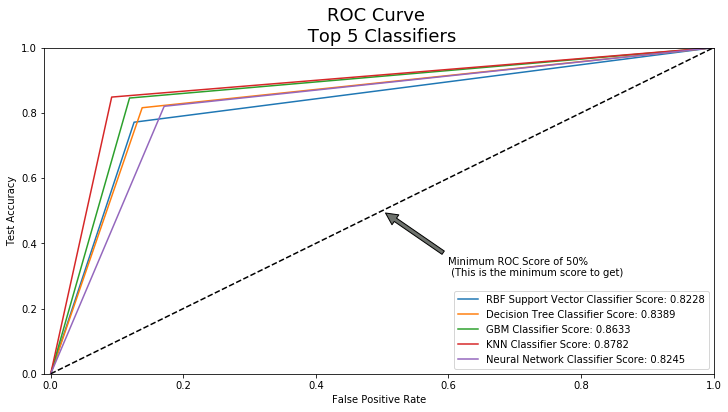

In [124]:
XGboost_tree_fpr, XGboost_tree_tpr, XGboost_tree_threshold = roc_curve(y_test,boost_pred )
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)
r_svc_fpr, r_svc_tpr, r_svc_threshold = roc_curve(y_test, svm_pred)
NN_fpr, NN_tpr, NN_threshold = roc_curve(y_test, NN_pred)
Knn_fpr, Knn_tpr, Knn_threshold = roc_curve(y_test, Knn_pred)
    
graph_roc_curve_t_multiple(XGboost_tree_fpr, XGboost_tree_tpr, r_svc_fpr, r_svc_tpr,
                            tree_fpr, tree_tpr,Knn_fpr, Knn_tpr,NN_fpr, NN_tpr)
plt.show()

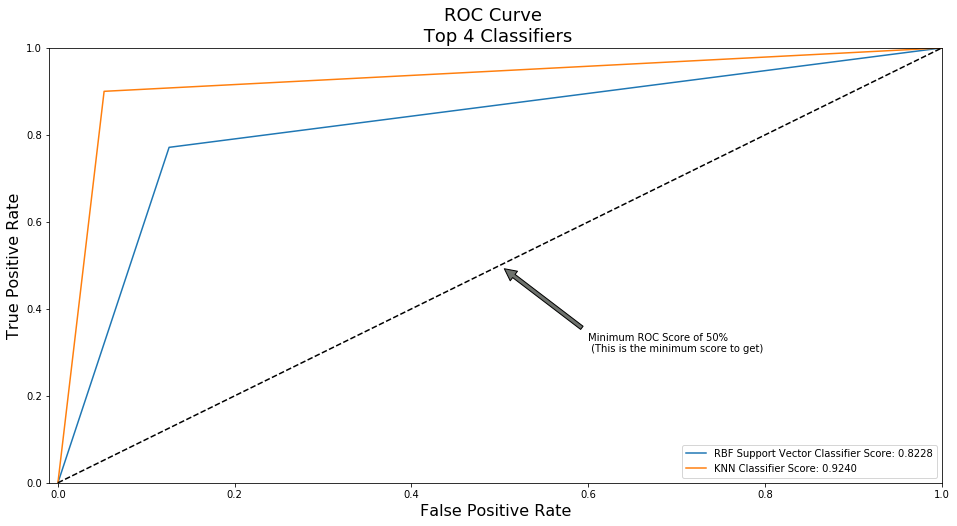

In [28]:
graph_roc_curve_t_multiple(r_svc_fpr, r_svc_tpr,Knn_fpr, Knn_tpr)
plt.show()

In [125]:
def graph_roc_curve_t_multiple(XGboost_tree_fpr, XGboost_tree_tpr,r_svc_fpr, r_svc_tpr,
                            tree_fpr, tree_tpr,Knn_fpr, Knn_tpr,NN_fpr, NN_tpr):
    plt.figure(figsize=(12,6))
    plt.title('ROC Curve \n Top 5 Classifiers', fontsize=18)
   
    plt.plot(r_svc_fpr, r_svc_tpr, label='RBF Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, 
                                                                                                      svm_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, 
                                                                                                tree_pred)))
    plt.plot(XGboost_tree_fpr, XGboost_tree_tpr, label='GBM Classifier Score: {:.4f}'.format(
         roc_auc_score(y_test,boost_pred)))
    plt.plot(Knn_fpr, Knn_tpr, label='KNN Classifier Score: {:.4f}'.format(
         roc_auc_score(y_test,Knn_pred)))
    plt.plot(NN_fpr, NN_tpr, label='Neural Network Classifier Score: {:.4f}'.format(
         roc_auc_score(y_test,NN_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('Test Accuracy', fontsize=10)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
            )
    plt.legend()